# Credit Risk Modeling using Gradient Boosted Trees

### Import data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cr_loan_prep = pd.read_csv('cr_loan_w2.xls')

### Train-test split

In [5]:
features = list(cr_loan_prep.columns)
features.remove('loan_status')

In [6]:
X = cr_loan_prep[features]
y = cr_loan_prep[['loan_status']]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

### Create a gradient boosted tree model

Model training

In [8]:
import xgboost as xgb

In [9]:
clf_gbt = xgb.XGBClassifier()
clf_gbt.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [10]:
preds = clf_gbt.predict(X_test)

In [11]:
preds_df = pd.DataFrame({'Prediction': list(preds)})

In [12]:
true_df = pd.DataFrame({'Actual': list(y_test['loan_status'])})

In [13]:
results = pd.DataFrame({'Actual': list(y_test['loan_status']),'Prediction': list(preds)})
results.head()

,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,1,0


In [14]:
y_proba = clf_gbt.predict_proba(X_test)
y_proba

array([[9.0582967e-03, 9.9094170e-01],
       [1.6012788e-02, 9.8398721e-01],
       [9.9919266e-01, 8.0736284e-04],
       ...,
       [9.5428050e-01, 4.5719486e-02],
       [6.5126348e-01, 3.4873655e-01],
       [9.4514960e-01, 5.4850418e-02]], dtype=float32)

In [15]:
preds_df = pd.DataFrame(y_proba[:,1], columns = ['prob_default'])
pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

,Actual,prob_default
0,1,0.990942
1,1,0.983987
2,0,0.000807
3,0,0.001239
4,1,0.084892
5,1,0.021722
6,0,0.010304
7,0,0.000375
8,1,0.976663
9,1,0.992004


### Gradient boosted portfolio performance

We want to assess the gradient boosted tree. Therefore, we create a classification report for the model.


In [16]:
target_names = ['Non-Default','Default']

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

   micro avg       0.93      0.93      0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



### Column Selection

We want to determine which columns are useful for the classification and which are not.

In [19]:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [21]:
clf_gbt = xgb.XGBClassifier()
clf_gbt.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

We print the column importance from the model

In [24]:
clf_gbt.get_booster().get_score(importance_type = 'weight')

{'loan_percent_income': 515,
 'loan_int_rate': 1001,
 'person_income': 1299,
 'loan_amnt': 519,
 'person_home_ownership_MORTGAGE': 116,
 'loan_grade_F': 9}

The most important feature is person_income.

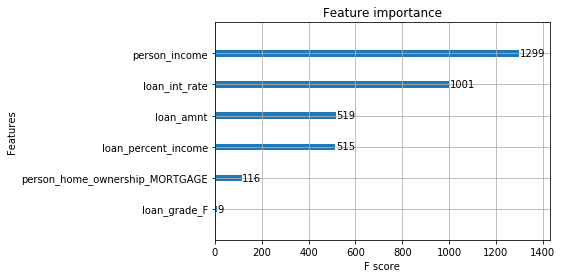

In [27]:
xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

The importance of the same column changes depending on the features that have been used to create the model.

In [30]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.4, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.4, random_state=123)

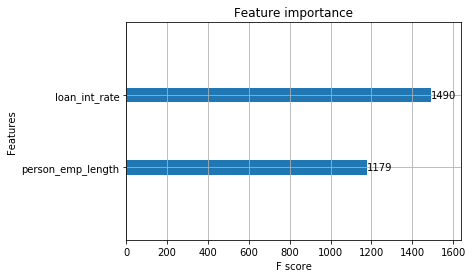

In [33]:
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

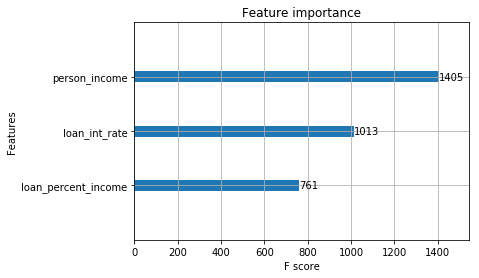

In [34]:
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

### Cross Validating Model

Credit loans and their data change over time, and it won't always look like what's been loaded into the current test sets. So, you can use cross-validation to try several smaller training and test sets which are derived from the original X_train and y_train.

In [35]:
X = cr_loan_prep[features]
y = cr_loan_prep[['loan_status']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

Set the values for number of folds and stopping iterations.

In [40]:
n_folds = 5 #n_folds is the number of folds
early_stopping = 10
params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

Create the DTrain matrix for XGBoost

In [38]:
DTrain = xgb.DMatrix(X_train, label = y_train)

Create the data frame of cross validations

In [41]:
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping) 

In [42]:
cv_df

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.898182,0.001318,0.892519,0.004650
1,0.909256,0.002052,0.902780,0.005053
2,0.913621,0.002205,0.906834,0.004423
3,0.918600,0.001092,0.910779,0.005221
4,0.922251,0.001818,0.914193,0.004422


### Cross-Validation Scoring

Create a gradient boosted tree model using two hyperparameters

In [43]:
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

In [45]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

We print the cross validation score

In [46]:
cv_scores

array([0.94095023, 0.93369541, 0.93186962, 0.92462653])

Print the average accuracy and standard deviation of the scores

In [47]:
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

Average accuracy: 0.93 (+/- 0.01)
